<a href="https://colab.research.google.com/github/sugi-san/ICON/blob/master/ICON.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

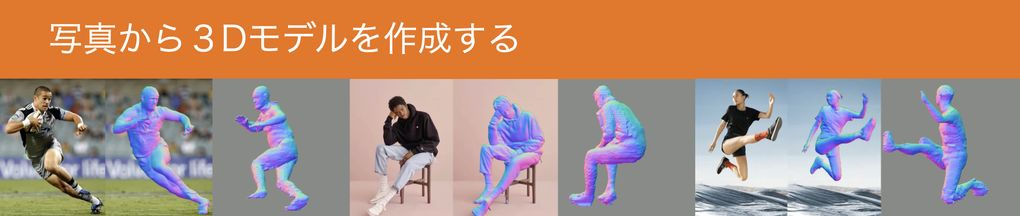

In [ ]:
#@title **1.セットアップ（30分程度かかります）**

# get the code of ICON
!git clone https://github.com/sugi-san/ICON.git

# package installation1
%cd /content/ICON
!bash colab.sh

# package installation2
%cd /content/ICON/apps
! source activate icon && pip install git+https://github.com/NVIDIAGameWorks/kaolin.git
! source activate icon && pip install git+https://github.com/YuliangXiu/neural_voxelization_layer.git

# data download
%cd /content/ICON
!bash data_download.sh

# difine function
# --- display_pic ---
import matplotlib.pyplot as plt
from PIL import Image
import glob
import numpy as np
import os

def display_pic(folder):
    from PIL import Image ###
    fig = plt.figure(figsize=(30, 60))
    files = sorted(glob.glob(folder+'/*.jpg'))
    for i, file in enumerate(files):
        img = Image.open(file)    
        images = np.asarray(img)
        ax = fig.add_subplot(10, 5, i+1, xticks=[], yticks=[])
        image_plt = np.array(images)
        ax.imshow(image_plt)
        name = os.path.basename(file)
        ax.set_xlabel(name, fontsize=30)               
    plt.show()
    plt.close()

# --- reset_folder ---
import shutil

def reset_folder(path):
    if os.path.isdir(path):
      shutil.rmtree(path)
    os.makedirs(path,exist_ok=True)

＊なお、セットアップの途中で下記のような**「まだ操作中ですか？」**という表示が現れることがあります。その時は**「私はロボットではありません」**をクリックして下さい。

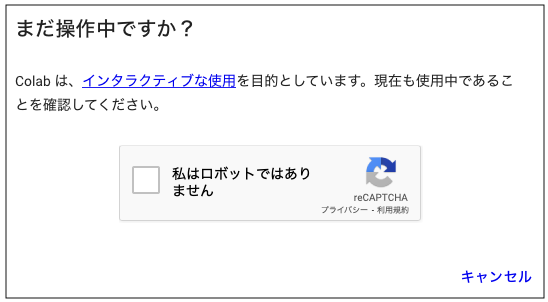

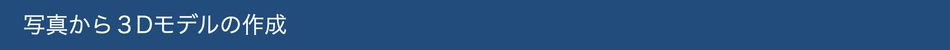

In [ ]:
#@title **2.写真の表示**
display_pic('/content/ICON/examples')

In [ ]:
#@title **3.3Dモデルの作成**

import shutil
picture = '06.jpg' #@param {type:"string"}
pic_path = '/content/ICON/examples/'+picture
reset_folder('/content/ICON/image')
shutil.copy(pic_path, '/content/ICON/image/'+picture)

%cd /content/ICON/apps
!source activate icon && python infer.py -cfg ../configs/icon-filter.yaml -loop_smpl 100 -loop_cloth 0 -colab -gpu 0 -export_video -in_dir ../image
# !source activate icon && python infer.py -cfg ../configs/pifu.yaml -loop_smpl 1 -loop_cloth 0 -colab -gpu 0 -export_video -in_dir ../examples
# !source activate icon && python infer.py -cfg ../configs/pamir.yaml -loop_smpl 100 -loop_cloth 0 -colab -gpu 0 -export_video -in_dir ../examples

# ログ・クリア
from IPython.display import clear_output
clear_output()

# 動画の再生
import IPython
from IPython.display import Image
from IPython.core.display import Video
import base64
from base64 import b64encode
from IPython.display import HTML
import os

test_id = os.path.splitext(picture)[0]
# example_filename 
video_path = f"/content/ICON/results/icon-filter/vid/{test_id}_cloth.mp4"
video_display_path = f"/content/ICON/results/icon-filter/vid/{test_id}_display.mp4"

def video(path):
    mp4 = open(path,'rb').read()
    data_url = "data:video/mp4;base64," + b64encode(mp4).decode()
    return HTML('<video width=700 controls loop> <source src="%s" type="video/mp4"></video>' % data_url)

# we cannot play a mp4 video generated by cv2
!ffmpeg -i $video_path -vcodec libx264 $video_display_path -y -loglevel quiet
video(video_display_path)


In [ ]:
#@title **4.動画のダウンロード**
from google.colab import files
files.download(video_display_path)

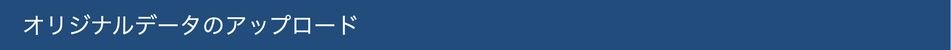

In [ ]:
#@title **5.写真のアップロード**
#@markdown ・1人だけ全身が写っている写真を使用して下さい

# ルートへ画像をアップロード
from google.colab import files
uploaded = files.upload()           
uploaded = list(uploaded.keys())    

# ルートから指定フォルダーへ移動
for file in uploaded:
    shutil.move(file, '/content/ICON/examples')

###【備考】
・ブラウザは、必ずGoogle Chromeを使用して下さい。

・動作がおかしくなった場合の対応\
１）グーグルクロームの該当タブを削除して接続を切る\
２）再度リンクを開く\
３）右上にある「ランタイム／ランタイムを出荷時設定にリセット」をクリックする（下記写真を参照に下さい）\
４）あとは、動画にある通りの操作をすればOK

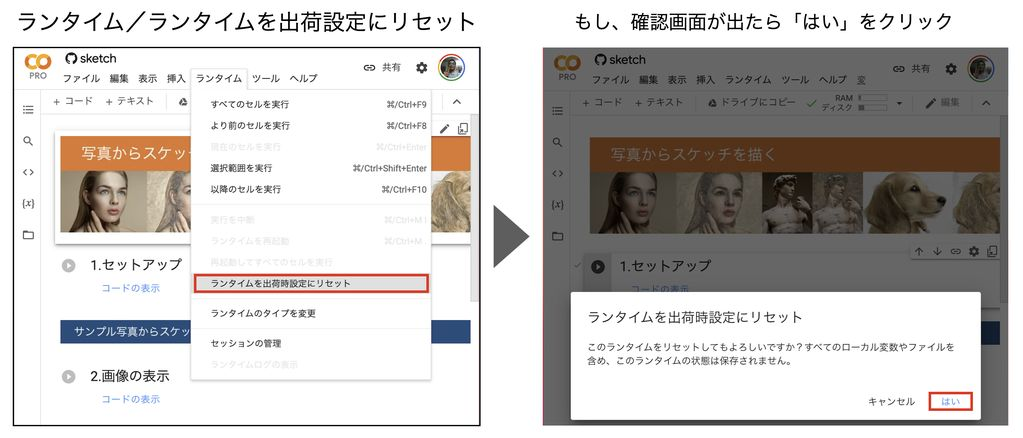